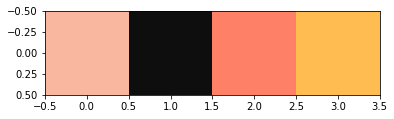

In [3]:
from matplotlib import image as img
import matplotlib.pyplot as plt
import pandas as pd

image = img.imread('./images/1.jpg')
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())

from scipy.cluster.vq import whiten
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])

from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)

r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()


In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
from matplotlib import image as img

image = img.imread('./images/1.jpg')
pixels = image.reshape(-1, 3)
# Perform k-means clustering to extract the dominant colors
kmeans = KMeans(n_clusters=5, random_state=0).fit(pixels)
centers = kmeans.cluster_centers_

colors = []
for color in centers:
    colors.append((int(color[0]), int(color[1]), int(color[2])))

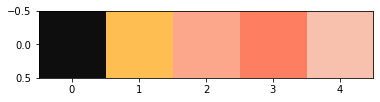

In [5]:
plt.imshow([colors])
plt.show()

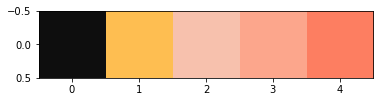

In [6]:
import numpy as np
dominant_colors = centers[np.argsort(np.unique(kmeans.labels_, return_counts=True)[1])[::-1]]
colors = []
for color in dominant_colors:
    colors.append((int(color[0]), int(color[1]), int(color[2])))
plt.imshow([colors])
plt.show()

In [19]:
colors_cb =[]
sim_matrix = np.array([[0, 0.90822864, 0.008192], [0, 1, 0], [0, 0, 1]], dtype=np.float16)
rgb_matrix = np.array(
        [[ 2.85831110e+00, -1.62870796e+00, -2.48186967e-02],
        [-2.10434776e-01,  1.15841493e+00,  3.20463334e-04],
        [-4.18895045e-02, -1.18154333e-01,  1.06888657e+00]]
        )

for color in colors:
    color_cb = np.tensordot(np.array(color).reshape((1,1,3)), sim_matrix, axes=([2], [1]))
    color_cb = np.tensordot(color_cb, rgb_matrix, axes=([2], [1]))
    colors_cb.append(color_cb.astype(np.uint8))

In [25]:
colors = []
for c in colors_cb:
    colors.append((int(c[0,0,0]), int(c[0,0,1]), int(c[0,0,2])))

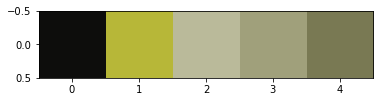

In [26]:
plt.imshow([colors])
plt.show()

In [ ]:
from colorblind import colorblind

colorblind.simulate_blindeness